In [148]:
# Ensure the project root is in PATH.
import sys

sys.path.append("../")
# All imports of our code are relative to the project root.

from backtester.engine import Backtester
from backtester.datamodel import TradingState, OrderDepth, Order, Listing
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sys
import os


# concatenates multiple days of historical data into 1.
# drops day column and replaces it with continuous timestamps.
# i.e. day -1 timestamp 0 becomes just timestamp 1,000,000
def concatenate_historical_data(data: list[pd.DataFrame]) -> pd.DataFrame:
    output = data[0]

    for i in range(1, len(data), 1):
        timeshift = output.iloc[-1]["timestamp"] + 100  # 100 for next day
        next_day_copy = data[i].copy()
        next_day_copy["timestamp"] += timeshift

        output = pd.concat([output, next_day_copy])

    return output

In [149]:
market_data_round_4_day_1 = pd.read_csv(os.path.join("..", "data", "round4", "prices_round_4_day_1.csv"), sep=";")
market_data_round_4_day_2 = pd.read_csv(os.path.join("..", "data", "round4", "prices_round_4_day_2.csv"), sep=";")
market_data_round_4_day_3 = pd.read_csv(os.path.join("..", "data", "round4", "prices_round_4_day_3.csv"), sep=";")

trades_round_4_day_1 = pd.read_csv(os.path.join("..", "data", "round4", "trades_round_4_day_1.csv"), sep=";")
trades_round_4_day_2 = pd.read_csv(os.path.join("..", "data", "round4", "trades_round_4_day_2.csv"), sep=";")
trades_round_4_day_3 = pd.read_csv(os.path.join("..", "data", "round4", "trades_round_4_day_3.csv"), sep=";")

observations_round_4_day_1 = pd.read_csv(os.path.join("..", "data", "round4", "observations_round_4_day_1.csv"), sep=",")
observations_round_4_day_2 = pd.read_csv(os.path.join("..", "data", "round4", "observations_round_4_day_2.csv"), sep=",")
observations_round_4_day_3 = pd.read_csv(os.path.join("..", "data", "round4", "observations_round_4_day_3.csv"), sep=",")

market_data_round_4_all3days = concatenate_historical_data([market_data_round_4_day_1, market_data_round_4_day_2, market_data_round_4_day_3])
trades_round_4_all3days = concatenate_historical_data([trades_round_4_day_1, trades_round_4_day_2, trades_round_4_day_3])
observations_round_4_all3days = concatenate_historical_data([observations_round_4_day_1, observations_round_4_day_2, observations_round_4_day_3])

In [150]:
MAGNIFICENT_MACARONS = "MAGNIFICENT_MACARONS"


def get_time_part(df: pd.DataFrame, l, h) -> pd.DataFrame:
    dfret = df.copy()
    dfret = dfret[(dfret["timestamp"] >= l) & (dfret["timestamp"] < h)].reset_index(drop=True)
    return dfret


def get_sunlight_part(
    md: pd.DataFrame, th: pd.DataFrame, obs: pd.DataFrame, low: float, high: float
) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Return three DataFrames (md_slice, th_slice, obs_slice) containing
    only the rows whose timestamps fall into the obs rows where
    sunlightIndex is in [low, high).
    """
    # 1) find all timestamps where sunlight is in the desired band
    mask = (obs["sunlightIndex"] >= low) & (obs["sunlightIndex"] < high)
    ts = obs.loc[mask, "timestamp"]

    # 2) slice each DataFrame by those timestamps
    md_slice = md[md["timestamp"].isin(ts)].reset_index(drop=True)
    th_slice = th[th["timestamp"].isin(ts)].reset_index(drop=True)
    obs_slice = obs.loc[mask].reset_index(drop=True)

    return md_slice, th_slice, obs_slice


md_all = market_data_round_4_all3days.copy()
th_all = trades_round_4_all3days.copy()
obs_all = observations_round_4_all3days.copy()

md_all = md_all[md_all["product"] == MAGNIFICENT_MACARONS]
th_all = th_all[th_all["symbol"] == MAGNIFICENT_MACARONS]


l, h = 0, 3e6
md_all = get_time_part(md_all, l, h)
th_all = get_time_part(th_all, l, h)
obs_all = get_time_part(obs_all, l, h)

### First lets try split the data into regimes 
 

Regime splitting: By sunlight value

In [151]:

# sunlight_thresh1 = 37
# sunlight_thresh2 = 54

# md_regime1, th_regime1, obs_regime1 = get_sunlight_part(md_all, th_all, obs_all, 0, sunlight_thresh1)
# md_regime2, th_regime2, obs_regime2 = get_sunlight_part(md_all, th_all, obs_all, sunlight_thresh1, sunlight_thresh2)
# md_regime3, th_regime3, obs_regime3 = get_sunlight_part(md_all, th_all, obs_all, sunlight_thresh2, 99999)


# mds = [md_regime1, md_regime2, md_regime3]
# ths = [th_regime1, th_regime2, th_regime3]
# obss = [obs_regime1, obs_regime2, obs_regime3]


Regime splitting: by each piecewise part

In [152]:
# md_regime1 = get_time_part(md_all, 0, 2e5)
# th_regime1 = get_time_part(th_all, 0, 2e5)
# obs_regime1 = get_time_part(obs_all, 0, 2e5)

# md_regime2 = get_time_part(md_all, 2e5, 4e5)
# th_regime2 = get_time_part(th_all, 2e5, 4e5)
# obs_regime2 = get_time_part(obs_all, 2e5, 4e5)

# md_regime3 = get_time_part(md_all, 4e5, 5e5)
# th_regime3 = get_time_part(th_all, 4e5, 5e5)
# obs_regime3 = get_time_part(obs_all, 4e5, 5e5)

# md_regime4 = get_time_part(md_all, 5e5, 6e5)
# th_regime4 = get_time_part(th_all, 5e5, 6e5)
# obs_regime4 = get_time_part(obs_all, 5e5, 6e5)

# md_regime5 = get_time_part(md_all, 6e5, 7e5)
# th_regime5 = get_time_part(th_all, 6e5, 7e5)
# obs_regime5 = get_time_part(obs_all, 6e5, 7e5)

# md_regime6 = get_time_part(md_all, 7e5, 9e5)
# th_regime6 = get_time_part(th_all, 7e5, 9e5)
# obs_regime6 = get_time_part(obs_all, 7e5, 9e5)

# md_regime7 = get_time_part(md_all, 9e5, 10e5)
# th_regime7 = get_time_part(th_all, 9e5, 10e5)
# obs_regime7 = get_time_part(obs_all, 9e5, 10e5)

# mds = [md_regime1, md_regime2, md_regime3, md_regime4, md_regime5, md_regime6, md_regime7]
# ths = [th_regime1, th_regime2, th_regime3, th_regime4, th_regime5, th_regime6, th_regime7]
# obss = [obs_regime1, obs_regime2, obs_regime3, obs_regime4, obs_regime5, obs_regime6, obs_regime7]

Regime splitting: by up/down/flat

In [153]:
# up
md_regime1 = pd.concat([get_time_part(md_all, 0, 2e5), get_time_part(md_all, 4e5, 5e5), get_time_part(md_all, 9e5, 10e5)], ignore_index=True)
th_regime1 = pd.concat([get_time_part(th_all, 0, 2e5), get_time_part(th_all, 4e5, 5e5), get_time_part(th_all, 9e5, 10e5)], ignore_index=True)
obs_regime1 = pd.concat([get_time_part(obs_all, 0, 2e5), get_time_part(obs_all, 4e5, 5e5), get_time_part(obs_all, 9e5, 10e5)], ignore_index=True)

# down
md_regime2 = pd.concat([get_time_part(md_all, 2e5, 4e5), get_time_part(md_all, 6e5, 7e5)], ignore_index=True)
th_regime2 = pd.concat([get_time_part(th_all, 2e5, 4e5), get_time_part(th_all, 6e5, 7e5)], ignore_index=True)
obs_regime2 = pd.concat([get_time_part(obs_all, 2e5, 4e5), get_time_part(obs_all, 6e5, 7e5)], ignore_index=True)

# flat
md_regime3 = pd.concat([get_time_part(md_all, 5e5, 6e5), get_time_part(md_all, 7e5, 9e5)], ignore_index=True)
th_regime3 = pd.concat([get_time_part(th_all, 5e5, 6e5), get_time_part(th_all, 7e5, 9e5)], ignore_index=True)
obs_regime3 = pd.concat([get_time_part(obs_all, 5e5, 6e5), get_time_part(obs_all, 7e5, 9e5)], ignore_index=True)

mds = [md_regime1, md_regime2, md_regime3]
ths = [th_regime1, th_regime2, th_regime3]
obss = [obs_regime1, obs_regime2, obs_regime3]

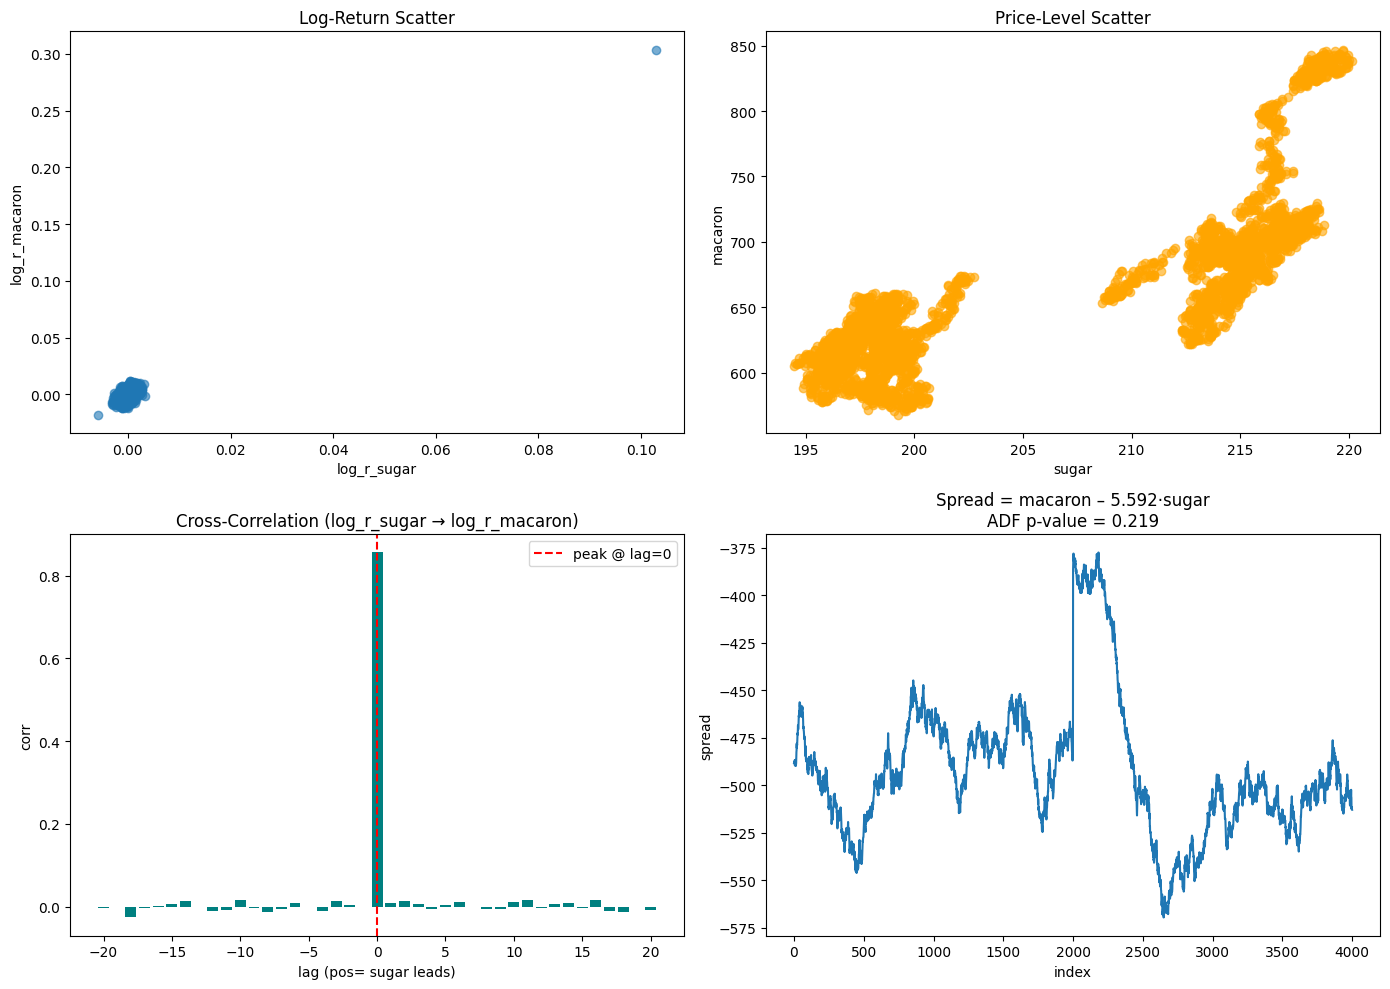

» Best lag:     0 (simultaneous)
» Max |corr|:   0.856
» Coint p-value: 0.4424 (no coint.)
» Spread β:     5.5919
» Spread ADF p-value: 0.2192 (non-stat)


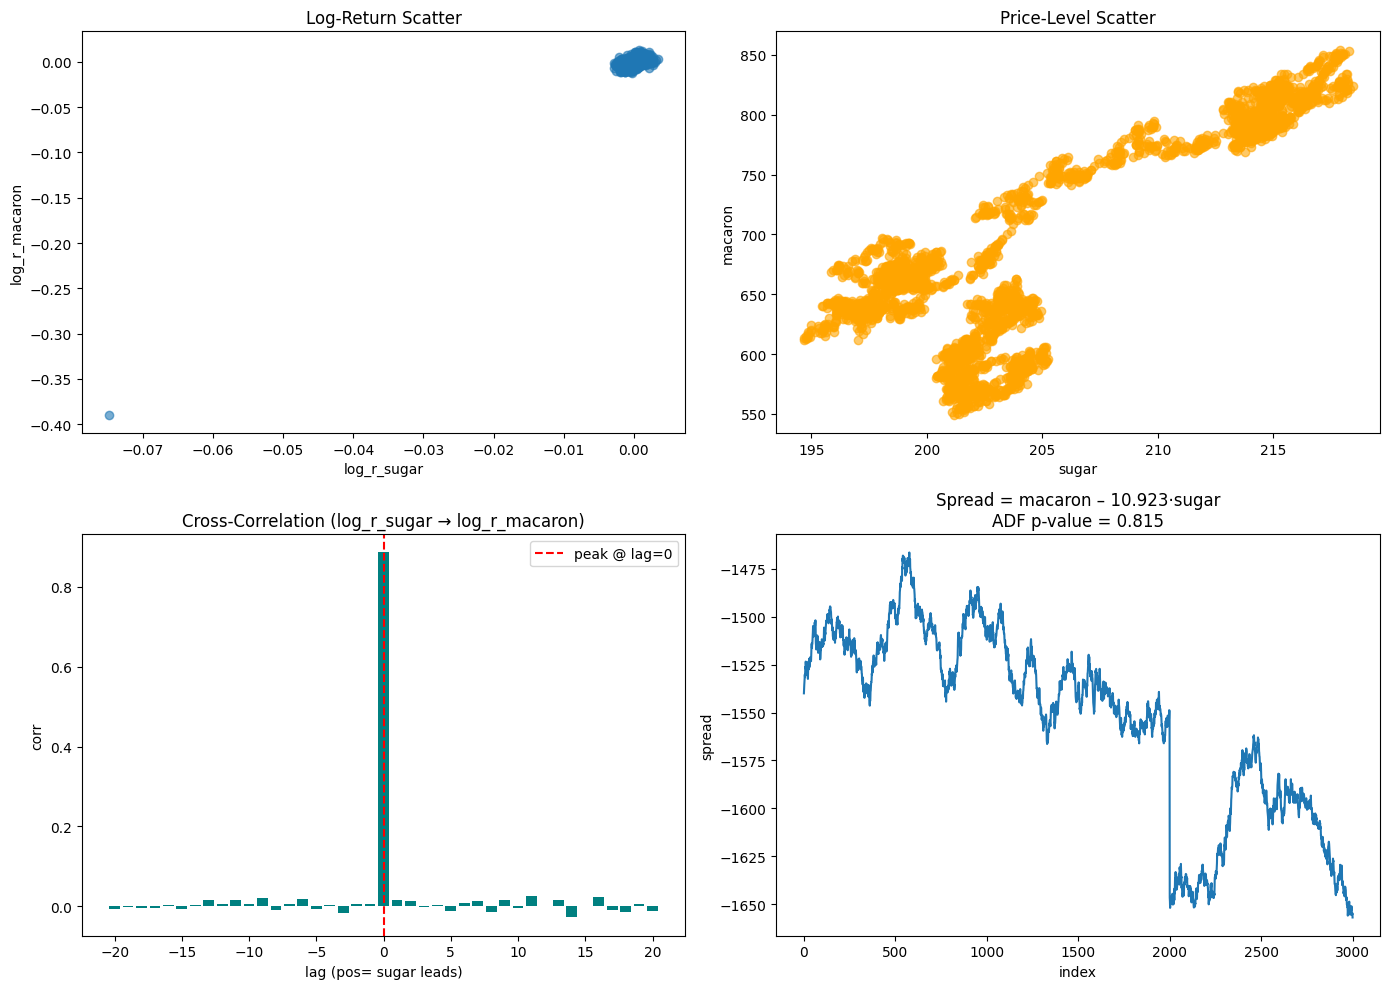

» Best lag:     0 (simultaneous)
» Max |corr|:   0.886
» Coint p-value: 0.9328 (no coint.)
» Spread β:     10.9234
» Spread ADF p-value: 0.8152 (non-stat)


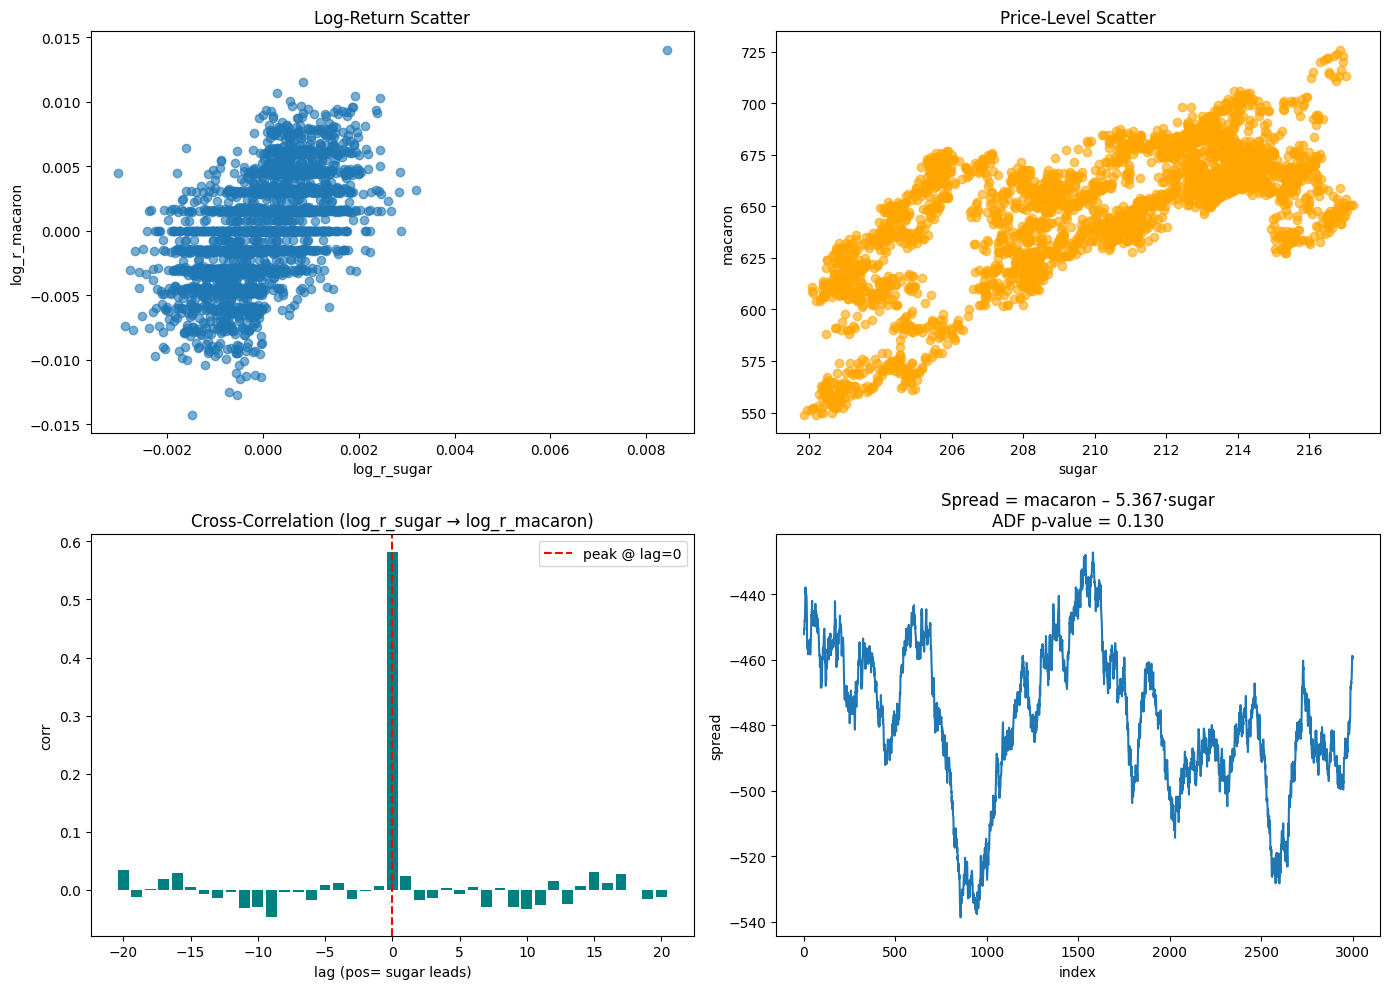

» Best lag:     0 (simultaneous)
» Max |corr|:   0.581
» Coint p-value: 0.3050 (no coint.)
» Spread β:     5.3672
» Spread ADF p-value: 0.1302 (non-stat)


In [154]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller


def analyse_regime(md, th, obs, max_lag=20, figsize=(14, 10)):
    # Test the macaron and sugar relationship. Check which one is lagging and which one is leading. We might be able to predict one using the other
    # Test cointegration. Are they cointegrated?
    # Test the spread
    # Is it mean reverting?

    df = pd.DataFrame()
    df["macaron"] = md["mid_price"]
    df["sugar"] = obs["sugarPrice"]
    df["log_r_macaron"] = np.log(df["macaron"]).diff()
    df["log_r_sugar"] = np.log(df["sugar"]).diff()
    df.dropna(inplace=True)

    # 2) lead/lag scan
    lags = np.arange(-max_lag, max_lag + 1)
    cors = [df["log_r_macaron"].corr(df["log_r_sugar"].shift(l)) for l in lags]
    best_ix = int(np.nanargmax(np.abs(cors)))
    best_lag = lags[best_ix]
    best_corr = cors[best_ix]
    lead_str = "sugar leads macaron" if best_lag > 0 else "simultaneous" if best_lag == 0 else "macaron leads sugar"

    # 3) cointegration test
    c_score, c_pvalue, _ = coint(df["macaron"], df["sugar"])

    # 4) fit spread
    X = sm.add_constant(df["sugar"])
    res = sm.OLS(df["macaron"], X).fit()
    beta = res.params["sugar"]
    df["spread"] = df["macaron"] - beta * df["sugar"]
    adf_stat, adf_p, *_ = adfuller(df["spread"])

    # 5) Plot grid
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    # a) log-return scatter
    ax = axes[0, 0]
    ax.scatter(df["log_r_sugar"], df["log_r_macaron"], alpha=0.6)
    ax.set_title("Log-Return Scatter")
    ax.set_xlabel("log_r_sugar")
    ax.set_ylabel("log_r_macaron")

    # b) price-level scatter
    ax = axes[0, 1]
    ax.scatter(df["sugar"], df["macaron"], alpha=0.6, color="orange")
    ax.set_title("Price-Level Scatter")
    ax.set_xlabel("sugar")
    ax.set_ylabel("macaron")

    # c) cross-correlation barplot
    ax = axes[1, 0]
    ax.bar(lags, cors, width=0.8, color="teal")
    ax.axvline(best_lag, color="red", linestyle="--", label=f"peak @ lag={best_lag}")
    ax.set_title("Cross-Correlation (log_r_sugar → log_r_macaron)")
    ax.set_xlabel("lag (pos= sugar leads)")
    ax.set_ylabel("corr")
    ax.legend()

    # d) spread time-series
    ax = axes[1, 1]
    df["spread"].plot(ax=ax)
    ax.set_title(f"Spread = macaron – {beta:.3f}·sugar\n" f"ADF p-value = {adf_p:.3f}")
    ax.set_xlabel("index")
    ax.set_ylabel("spread")

    plt.tight_layout()
    plt.show()

    # 6) print summary stats
    print("» Best lag:".ljust(15), best_lag, f"({lead_str})")
    print("» Max |corr|:".ljust(15), f"{best_corr:.3f}")
    print("» Coint p-value:".ljust(15), f"{c_pvalue:.4f}", "(stationary spread)" if c_pvalue < 0.05 else "(no coint.)")
    print("» Spread β:".ljust(15), f"{beta:.4f}")
    print("» Spread ADF p-value:".ljust(15), f"{adf_p:.4f}", "(mean-reverting)" if adf_p < 0.05 else "(non-stat)")


for i in range(len(mds)):
    current_regime_idx = i
    md_current = mds[current_regime_idx]
    th_current = ths[current_regime_idx]
    obs_current = obss[current_regime_idx]

    analyse_regime(md_current, th_current, obs_current)

No matter what regime split or regime I use, I see that the cross correlation between lag returns is always ~0.6 for lag 0 but for any other lag its 0. This means neither of macarons or sugar predict each other.  

Thoughts   
- can't use sugar or macaron to lag predict each other. there is like literally no correlation its a fucking blob when u scatterplot it lol.  
- still has to be something to do with regimes right? just not sure how to split it, i've tried splitting by (low/medium/high sunlight level), i've tried splitting it by (up/down/flat gradient), i've tried splitting by every single individual piecewise section, but I haven't observed results in any, I haven't seen any pattern.  
- in one of the partitions i saw that the ADF p-test got < 0.05 but that might just be by coincidence. ADF test shows that the spread between $macron - \beta * sugar$ is staionary, but even if its stationary I don't know how to make money off that.

In [191]:
df = pd.DataFrame()

df["sugar"] = obs_all["sugarPrice"].rolling(1).mean()
df["macaron"] = md_all["mid_price"].rolling(1).mean()


def get_corr(sugar_lag=np.nan, sugar_lead=np.nan, macaron_lag=np.nan, macaron_lead=np.nan) -> float:
    sugar_logreturn = None
    macaron_logreturn = None

    if not np.isnan(sugar_lag):
        sugar_logreturn = np.log(df["sugar"]) - np.log(df["sugar"]).shift(sugar_lag)
    elif not np.isnan(sugar_lead):
        sugar_logreturn = np.log(df["sugar"]).shift(-sugar_lead) - np.log(df["sugar"])

    if not np.isnan(macaron_lag):
        macaron_logreturn = np.log(df["macaron"]) - np.log(df["macaron"]).shift(macaron_lag)
    elif not np.isnan(macaron_lead):
        macaron_logreturn = np.log(df["macaron"]).shift(-macaron_lead) - np.log(df["macaron"])

    # Align and drop NaNs
    aligned = pd.DataFrame({"sugar": sugar_logreturn, "macaron": macaron_logreturn}).dropna()

    if aligned.empty:
        return np.nan

    return np.corrcoef(aligned["sugar"], aligned["macaron"])[0, 1]

corrs = {}
for sugar_lag in range(1,20,1):
    for macaron_lead in range(1,20,1):
        corrs[sugar_lag, macaron_lead] = get_corr(sugar_lag=sugar_lag, macaron_lead=macaron_lead)

print(sorted(corrs.items(),reverse=True))

[((19, 19), -0.02360750501711805), ((19, 18), -0.02213299973848672), ((19, 17), -0.020593489507768837), ((19, 16), -0.018940202169858103), ((19, 15), -0.01761849149546521), ((19, 14), -0.017033822267811347), ((19, 13), -0.015427785054062457), ((19, 12), -0.014459727620404915), ((19, 11), -0.013532670724325787), ((19, 10), -0.012580428043577804), ((19, 9), -0.01043403329595523), ((19, 8), -0.00898212557127077), ((19, 7), -0.0074856370129982655), ((19, 6), -0.00555323657881683), ((19, 5), -0.003970809946785571), ((19, 4), -0.0026801375319299215), ((19, 3), -0.0007511946785523441), ((19, 2), 0.0004208439314291417), ((19, 1), 0.0012919203225057636), ((18, 19), -0.02203025830488317), ((18, 18), -0.02065724793898771), ((18, 17), -0.018707763888252363), ((18, 16), -0.017122177837801084), ((18, 15), -0.015804025172367887), ((18, 14), -0.014342013970890714), ((18, 13), -0.01309392718976068), ((18, 12), -0.012087446777749252), ((18, 11), -0.01138643328912171), ((18, 10), -0.009910914899198497), 